# **Курс "Програмування на мові Python"**

## **Практичне зайняття №12**

### Тема: "Рекурсивні структури даних"

### **1. Обхід двійкового дерева**

На практиці рекурсію дуже часто застосовують для обробки самоповторювальних структур, зокрема дерев та списків. Для прикладу розглянемо двійкове дерево.

В програмуванні **двійкове дерево** — структура даних у вигляді дерева, в якому кожна вершина має не більше двох дітей.

*Коренем* дерева називається верхній вузол дерева.

*Дитиною* називається вузол, безпосередньо приєднаний до іншого на шляху від кореня.

*Батько* — зворотне поняття до дитини.

*Брати, сестри* — вузли з того ж батька.

*Нащадок* — вузол, досяжний послідовними переходами від батька до дитини.

*Предок* — вузол, досяжний послідовними переходами від дитини до батька.

*Лист* (також Зовнішній вузол) — вузол, який не має дітей.

*Ребро* — з'єднання від одного вузла до іншого.

*Висота дерева* — число ребер найдовшого шляху між коренем і листом.

Приклад простого двійкового дерева:

>![Binary tree](https://snappygoat.com/b/b110b8d5c1ea9c3311e8f4661b6f437c0788177a)



Будь-яке дерево можна представити у вигляді вкладених списків. Список, що зберігає дерево, може мати таку загальну структуру:

```
[data, left subtree as list, right subtree as list]
```

Двійкове дерево з попередньої ілюстрації у формі списку матиме вигляд:

```
[2, 
[7, [2, [], []], [6, [5, [], []], [11, [], []]]],
[5, [], [9, [4, [], []], []]]]
```

Обхід цього дерева можна здійснити за допомогою рекурсивної функції tree_rec():

In [ ]:
import sys

tree = [2, [7, [2, [], []], [6, [5, [], []], [11, [], []]]], [5, [], [9, [4, [], []], []]]]

def tree_rec(s):
    if (s[1] != []):
        tree_rec(s[1])
    print(str(s[0]), end=" ")
    if (s[2] != []):
        tree_rec(s[2])

tree_rec(tree)

Під час обходу список можна модифікувати. У наступному прикладі до кожного значення у вузлах дерева додається 1.

In [ ]:
import sys

tree = [2, [7, [2, [], []], [6, [5, [], []], [11, [], []]]], [5, [], [9, [4, [], []], []]]]

def tree_rec(s):
    if (s[1] != []):
        tree_rec(s[1])
    s[0] = s[0] + 1
    if (s[2] != []):
        tree_rec(s[2])

tree_rec(tree)
print(tree)

### **2. Ханойська вежа**

*Ханойська вежа* - відома математична гра (головоломка). Ханойська вежа складається з трьох стрижнів та кількох дисків різних діаметрів, насаджених на ці стрижні. У початковому стані всі диски насаджені на один стрижень у порядку зменшення розміру дисків, а два інші стрижні порожні. Ціль головоломки - перенести усі диски з одного стрижня на інший за найменшу кількість кроків, дотримуючись таких правил:
- за раз можна переносити лише один диск;

- кожен крок полягає в перенесенні верхнього диска з одного зі стрижнів на інший стрижень;

- більший диск не можна класти на менший.

Приклад Ханойської вежі з шістьма дисками:

![](https://upload.wikimedia.org/wikipedia/commons/8/8d/Iterative_algorithm_solving_a_6_disks_Tower_of_Hanoi.gif) 

Нехай стрижні мають назви A, B та С (зліва направо). Нехай n - загальна кількість дисків. Тоді для перенесення n дисків зі стрижня А на стрижень C потрібно виконати 3 дії:

1. перенести n-1 дисків зі стрижня А на стрижень B;

2. перенести останній диск зі стрижня А на стрижень C;

3. перенести n-1 дисків зі стрижня B на стрижень C.

Провівши декомпозицію кроків 1 і 3, можна отримати перелік більшої кількості подібних кроків, але вже для n-2 дисків. Приклад декомпозиції операцій для Ханойської вежі з чотирма дисками подано за [посиланням](https://upload.wikimedia.org/wikipedia/commons/2/20/Tower_of_Hanoi_recursion_SMIL.svg).

Розглянемо функцію towers(), що визначає кроки для перенесення n дисків зі стрижня А на стрижень C.

In [ ]:
def printMove(fr, to):
    print('move from ' + str(fr) + ' to ' + str(to))

def towers(n, fr, to, spare):
    if n == 1:
        printMove(fr, to)
    else:
        towers(n - 1, fr, spare, to)
        towers(1, fr, to, spare)
        towers(n - 1, spare, to, fr)

towers(3, 'A', 'C', 'B')

Роботу цієї програми можна подати у вигляді дерева викликів. Нижче подано дерево викликів для n = 3:

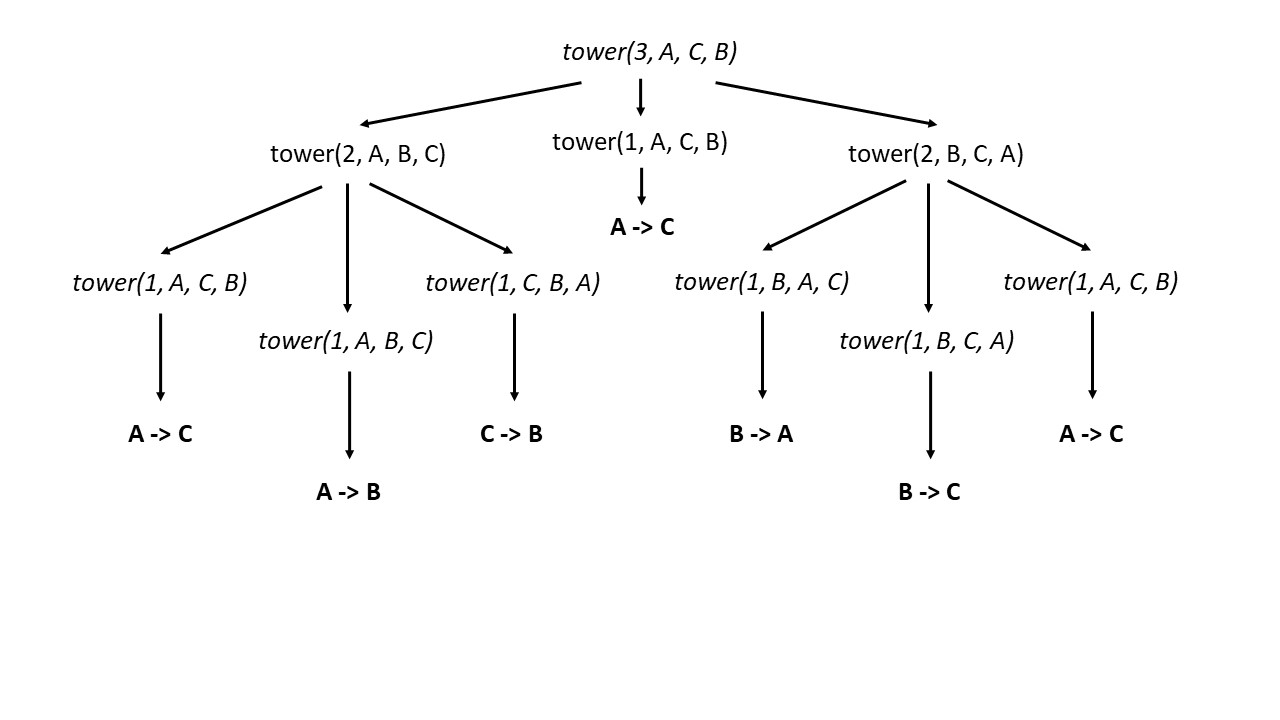

### **3. Обробка списків за допомогою рекурсивних функцій**

Припустимо, що є список:

```
[[[[1,2,3] , [a,b,c]]]]
```

Для зменшення надлишковості іноді потрібно позбутися вкладених списків, щоб отримати новий список, який буде містити усі елементи вихідного списку. Це можна зробити за допомогою рекурсивної функції:

In [ ]:
list1 = [[[[1,2,3],[4,5,6]]]]
list2 = [[],[1,2,[3]],[[4,5],6]]

def flat(S):
    if S == []:
        return S
    if type(S[0]) == list:
        return flat(S[0]) + flat(S[1:])
    return S[:1] + flat(S[1:])

print(flat(list1))
print(flat(list2))

Також рекурсію можна використати для згортання списків. Приклад:

In [ ]:
list1 = [1, 2, 3, 4, 5, 6]

def rreduce(f, init, default=None):                     
    if default is None:
        default = init[0]
        init = init[1:]
    if len(init) == 0:
        return default
    return rreduce(f, init[1:], f(default, init[0]))

print(rreduce(lambda a, b: a + b, list1))
print(rreduce(lambda a, b: a * b, list1))
print(rreduce(lambda a, b: str(a) + str(b), list1))

Зверніть увагу на те, що рекурсивна функція rreduce() є функцією вищих порядків.